# Plots Task 2

### Import librerias

In [45]:
import lithops
import pandas as pd
from io import StringIO
from pandasql import sqldf
from lithops import Storage
from lithops import FunctionExecutor
from pylab import *
import matplotlib.pyplot as plt
from lithops.multiprocessing import Pool
from config_file import config

In [80]:
fexec = lithops.FunctionExecutor()

2021-06-11 20:13:28,532 [INFO] lithops.config -- Lithops v2.3.3
2021-06-11 20:13:28,533 [INFO] lithops.storage.backends.localhost.localhost -- Localhost Storage client created
2021-06-11 20:13:28,533 [INFO] lithops.localhost.localhost -- Localhost compute client created
2021-06-11 20:13:28,534 [INFO] lithops.executors -- Localhost Executor created with ID: 7bc4ef-6


### Funciones auxiliares

In [81]:
def formatar(query):
    query = query.str.replace('00:00:00.000000','',regex=True)
    query = query.str.replace('2020','20',regex=True)
    query = query.str.replace('2021','21',regex=True)
    return query

In [82]:
def graph_plot(query, x, y):
    fig, ax = plt.subplots(figsize=(16, 7))
    query[x] = formatar(query[x])
    ax.plot(query[x], query[y])
    plt.show()

### Query 1: consulta n casos por tiempo en la comarca del Tarragones

In [83]:
fexec.call_async(main.getData, "SELECT NumCasos, TipusCasData FROM database WHERE ComarcaDescripcio='TARRAGONES' GROUP BY TipusCasData")
query = fexec.get_result()

2021-06-11 20:13:31,865 [INFO] lithops.invokers -- ExecutorID 7bc4ef-6 | JobID A000 - Selected Runtime: python3 
2021-06-11 20:13:31,888 [INFO] lithops.job.job -- ExecutorID 7bc4ef-6 | JobID A000 - Uploading function and data - Total: 29.1KiB
2021-06-11 20:13:31,889 [INFO] lithops.invokers -- ExecutorID 7bc4ef-6 | JobID A000 - Starting function invocation: getData() - Total: 1 activations
2021-06-11 20:13:31,895 [INFO] lithops.invokers -- ExecutorID 7bc4ef-6 | JobID A000 - View execution logs at /tmp/lithops/logs/7bc4ef-6-A000.log
2021-06-11 20:13:31,897 [INFO] lithops.wait -- ExecutorID 7bc4ef-6 - Getting results from functions


    0%|          | 0/1  

2021-06-11 20:13:46,792 [INFO] lithops.executors -- ExecutorID 7bc4ef-6 - Cleaning temporary data


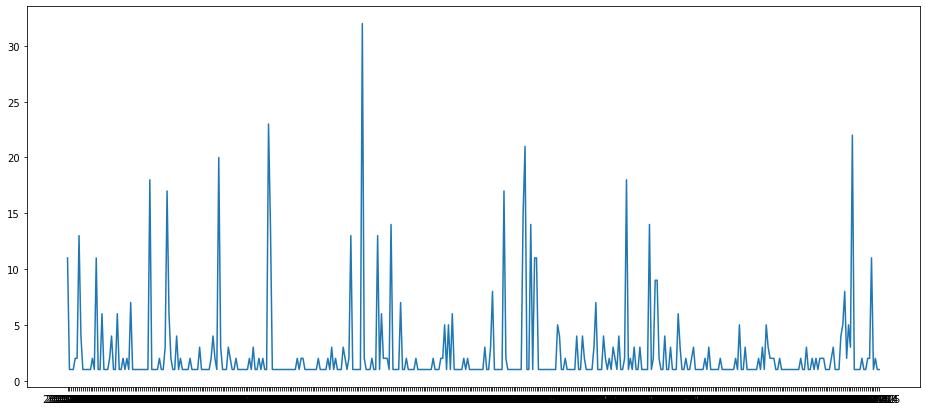

In [84]:
query['TipusCasData'] = formatar(query['TipusCasData'])
graph_plot(query, 'TipusCasData', 'NumCasos')